# Analysis for RSQ4

RSQ4: The main question I wish to answer is: **Which generation is the strongest?** 

I will also take a deeper look into the generations in order to answer my sub-questions: **What trends can be seen over the generations (types, stregth rise, stat distribution)?** 


**A generation is a grouping of the Pokémon games that separates them based on the Pokémon they include. In each generation, a new set of pokémon, region, moves, and abilities that did not exist in the previous generation are released.** Currently, there are 8 generations of pokémon.

## Task 1: Imports and Local Files

Below are the necessary imports needed for this notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
import numpy as np

from scipy import stats

In [2]:
plt.style.use('ggplot')

I also loaded the saved local file to a dataframe.

In [3]:
df_gen = pd.read_csv("401_all_generation_pokemon_data.csv")

I save the stats columns of this dataframe to their own variable for easier access to them for analysis and to compare between generations.

In [4]:
All_Stats_Gen = df_gen[['HP', 'ATTACK','DEFENSE','SPECIAL_ATTACK','SPECIAL_DEFENSE','SPEED','GENERATION_NO']]

## Task 2: Strongest Generation

In answering the main RSQ, I created a box plot of each generation and their base stat total distribution. As we can see, generation 4 has the pokémon with the highest stat total as well as the highest median. This can indicate that pokémon that were added in this generation were stronger on average in comparison to other generations.

In terms of median, it appears that pokémon have been getting stronger over the generations. We can see in the first three generations that the median is around 400 points, but after generation 4, it seems to be in the range of 450-500 points.

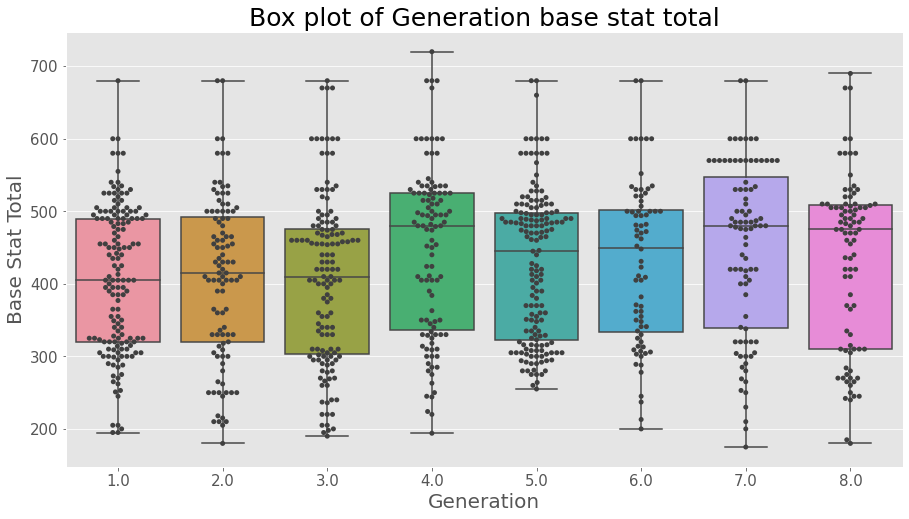

In [5]:
fig, ax = plt.subplots(figsize = (15,8))

bp = sns.boxplot(x='GENERATION_NO',y='TOTAL_STAT', data=df_gen, ax=ax)
bp = sns.swarmplot(x='GENERATION_NO',y='TOTAL_STAT', data=df_gen, color=".25")

plt.title('Box plot of Generation base stat total',fontsize = 25)

plt.xlabel('Generation',fontsize = 20)
plt.ylabel('Base Stat Total',fontsize = 20)
plt.tick_params(labelsize= 15)
plt.savefig('402_0_GenerationStatTotalDistribution_BoxPlot.png', dpi = 300, format='png', bbox_inches='tight')

## Task 3: Generation Analysis

Firstly, I counted the number of pokemon per generation and created a countplot of this information. From this we can see that later generations, after generation 5, have less new pokémon added. This may result in later generations results being skewed.

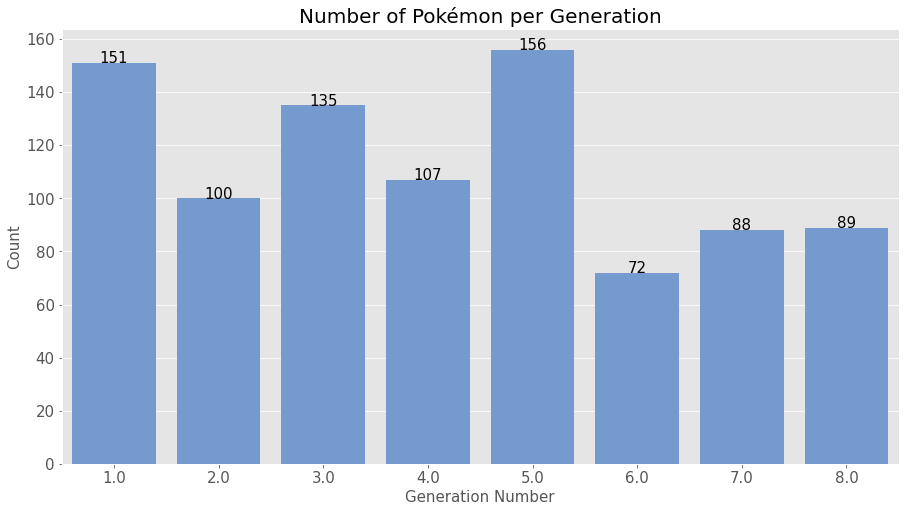

In [6]:
fig, ax = plt.subplots(figsize = (15,8))

ax = sns.countplot(x='GENERATION_NO',  data=df_gen, color = '#69d')
ax.set_title('Number of Pokémon per Generation', fontsize = 20)
ax.set_xlabel('Generation Number', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.tick_params(labelsize = 15)

for p in ax.patches:
    #gets each generations count value and prints it above its bar plot
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+.4, p.get_height()), ha = 'center', color='black', size=15)
    
plt.savefig('402_1_NumberPokemonGeneration_CountPlot.png', dpi = 300, format='png', bbox_inches='tight')

Next, I used the groupby function to group the dataframe to the generations. Then, I made a line plot of the mean of the total stats per generation. It seems that the mean has increased over the generations, with generation 4 and 7 being the highest. 

I chose to set the y-limit to 400 base stat points as there was a lot of whitespace present when set to 0.

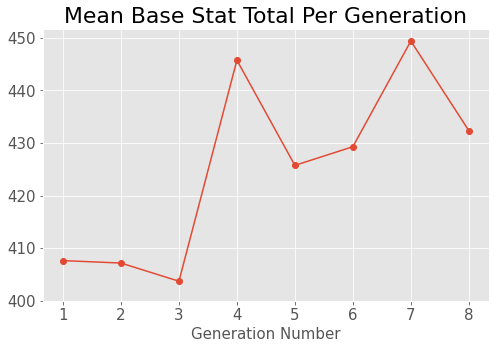

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
grouped = df_gen.groupby('GENERATION_NO')
g = grouped['TOTAL_STAT'].mean()

ax = g.plot.line(x = 'GENERATION_NO', marker='o')
ax.set_title('Mean Base Stat Total Per Generation', fontsize= 22)
ax.set_xlabel('Generation Number', fontsize = 15)
ax.tick_params(labelsize=15)
ax.set_ylim(400)

plt.savefig('402_2_MeanStatTotalGeneration_LinePlot.png', dpi = 300, format='png', bbox_inches='tight')

Next, I group the stat categories from the dataframe and use a groupby function to group them to their generation number. From this, I find the mean of each stat category and then create a line plot from these results. 

I set the y-limit to 60 stat points as there was a lot of whitespace when set to 0.

We can see that attack is usually the highest stat on average and has had a clear rise over the generations. Notably, we can also see that in generation 4 all stat categories had a sharp rise and in generation 7 the stat categories rose again or stayed about the same. This matches our findings from above which showed that generation 4 and 7 had the highest mean. 

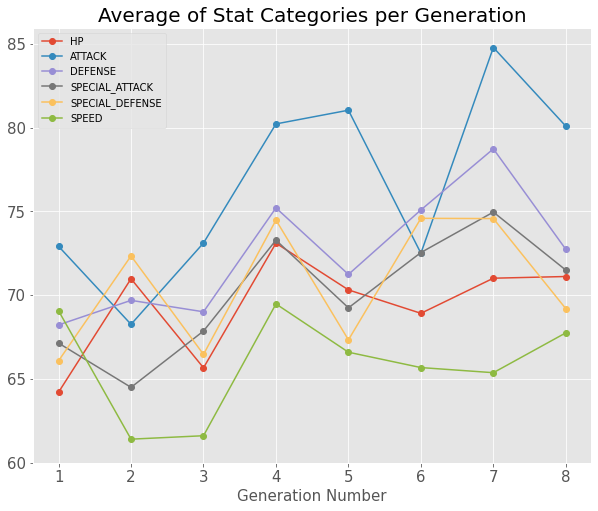

In [8]:
#groups all stat categories and plots the mean
stgen = All_Stats_Gen.groupby('GENERATION_NO')
ax = stgen.mean().plot.line(marker='o', figsize=(10,8))

ax.set_title('Average of Stat Categories per Generation', fontsize = 20)
ax.set_xlabel('Generation Number', fontsize = 15)
ax.tick_params(labelsize=15)
ax.set_ylim(60)

plt.savefig('402_3_MeanAllStatsGeneration_LinePlot.png', dpi = 300, format='png', bbox_inches='tight')

To look at each category individually I also created an array of line plots. I set their y-limit to be between 60-85 so that all line plots were levelled. 

For HP, we can see a sporadic change up until generation 4 where the mean for HP was at its highest and has since stabalised at around 70 points. 

Attack, Special Attack and Defense have had a clear rise over the generations. With Attack having an initial steady increase up until generation 5 and then having a sharp decline in generation 6 before reaching its highest value in generation 7, while Defense/Special Attack were stable in the first 3 generations before having a sharp increase in generation 4 and then steadily increasing until its peak at generation 7 again. It is worth noting that despite these categories being at their peak, they then fell in generation 8.

Special Defense has been sporadic and staying around the same points level of 65-75, with generation 4 and 7 having a Special Defense on the higher points side.

Speed is the only category that has not made an obvious increase over generations. In early generations, Speed declined sharply before returning to its original value in generation 4. Speed then had a smaller, more stable decline over the following genrations but has had its first increase since genration 4 in the most recent installment.

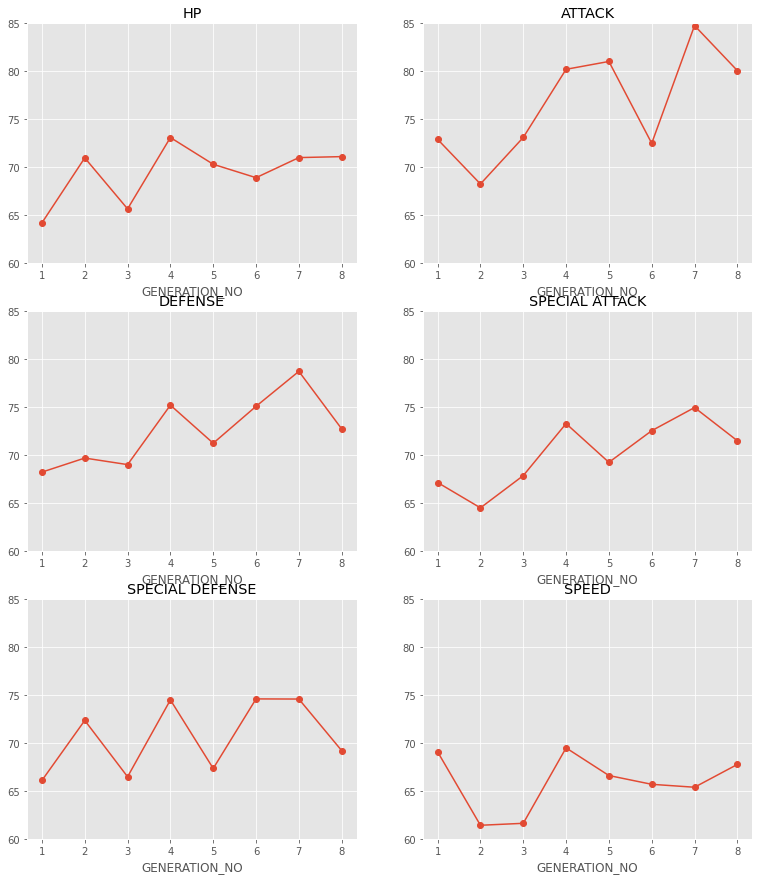

In [9]:
fig, axarr = plt.subplots(3, 2, figsize=(13, 15))

#lineplot of HPs mean
stgen['HP'].mean().plot.line(marker='o', 
                             title = 'HP', ax=axarr[0][0], ylim = (60, 85))
#lineplot of Attacks mean
stgen['ATTACK'].mean().plot.line(marker='o', 
                                 title = 'ATTACK', ax=axarr[0][1], ylim = (60, 85))
#lineplot of Defenses mean
stgen['DEFENSE'].mean().plot.line(marker='o', 
                                  title = 'DEFENSE', ax=axarr[1][0], ylim = (60, 85))
#lineplot of Special Attacks mean
stgen['SPECIAL_ATTACK'].mean().plot.line(marker='o', 
                                         title = 'SPECIAL ATTACK', ax=axarr[1][1], ylim = (60, 85))
#lineplot of Special Defenses mean
stgen['SPECIAL_DEFENSE'].mean().plot.line(marker='o', 
                                          title = 'SPECIAL DEFENSE', ax=axarr[2][0], ylim = (60, 85))
#lineplot of Speeds mean
stgen['SPEED'].mean().plot.line(marker='o', 
                                title = 'SPEED', ax=axarr[2][1], ylim = (60, 85))

plt.savefig('402_4_MeanAllStatsGeneration_6_LinePlot.png', dpi = 300, format='png', bbox_inches='tight')

Next, I check to see if there is a trend in the most common pokémon over the generations. I start by looking for the top 10 most common pokémon which I will include in my line plot. From this, I use the groupby function to group the generation and type in the dataframe and use a count function to each type within said generation. 

We can see that water-type pokémon is the most common pokémon overall and this was established early on in the game as the first 3 generations have it as their most common type. 

Its also clear that most of these popular types had an increase in generation 5. This may be because this generation had the most new pokémon added which would increase the likelihood of a given type being present. We can see that despite generation 1 having a similar number of pokémon this generation is less varied than generation 5, with the majority of pokemon being a water or normal type in first generation while fifth generation has bug followed by water, normal and grass type which are all relatively close in range.

It is also worth noting that the sharp decline in generation 6 is a result of this being the generation with the lowest number of new pokémon added. Thus, going from a generation with 156 new pokémon to 72 would cause a natural decline for most of these types. We saw from above that less pokémon are being added after generation 5 and this is evident in the line plot as the count for these types is significantly lower.

In [10]:
df_gen['TYPE1'].value_counts().head(10)

water       123
normal      109
grass        86
bug          75
fire         58
psychic      58
rock         50
electric     49
dark         36
fighting     36
Name: TYPE1, dtype: int64

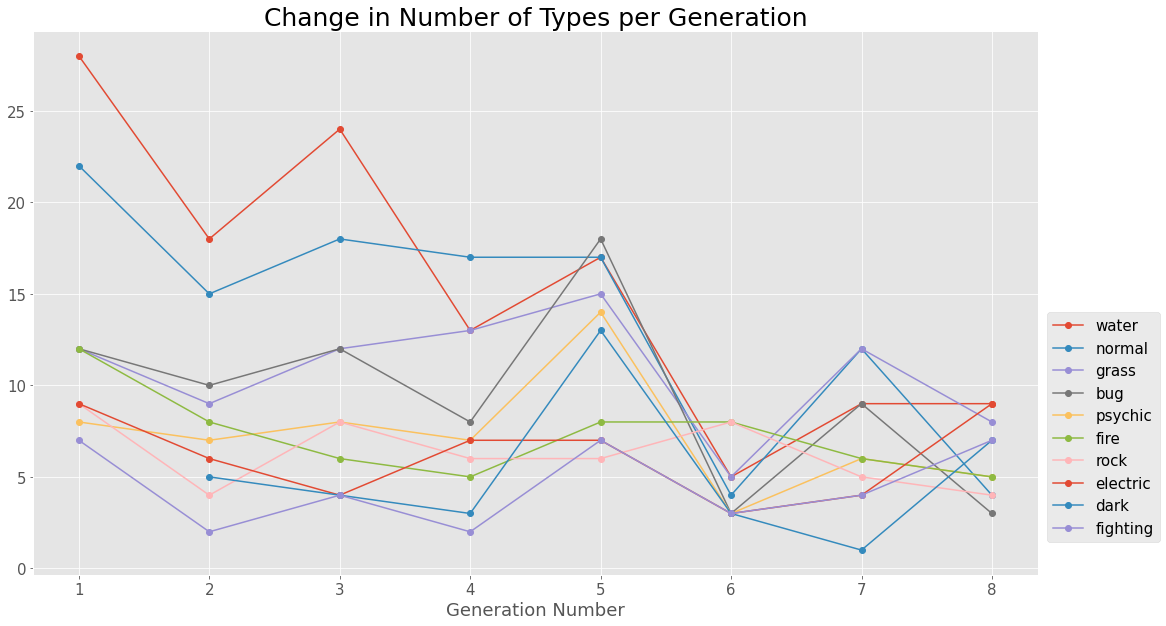

In [12]:
gen_count = df_gen.groupby(['GENERATION_NO','TYPE1']).count().reset_index()

#NOTE: Total Stat represents the count for every type per generation
gen_count = gen_count[['GENERATION_NO','TYPE1','TOTAL_STAT']]
#reshapes df so that Generation is the index and the types are their own columns
gen_count = gen_count.pivot('GENERATION_NO','TYPE1','TOTAL_STAT')

gen_count[['water', 'normal','grass', 'bug', 'psychic', 'fire', 'rock', 'electric', 'dark', 'fighting']].plot(kind = 'line', marker ='o')

fig=plt.gcf()

plt.legend(bbox_to_anchor=(1, 0.5), bbox_transform=plt.gcf().transFigure, prop={'size' : 15})
plt.title('Change in Number of Types per Generation', fontsize= 25)
plt.xlabel('Generation Number', fontsize=18)
plt.tick_params(labelsize=15)

fig.set_size_inches(18,10)
plt.show()

fig.savefig('402_5_TypesCountGeneration_LinePlot.png', dpi = 300, format='png', bbox_inches='tight')